In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
file_input='./data/dataset.csv'
file_output='./data/submission_own.csv'

In [3]:
df=pd.read_csv(file_input)
df

,termNum,distNum,blockNum,Time,powerNum,Power
0,1,1,13,2020/6/1 10:00,1,29.429
1,1,1,13,2020/6/1 10:05,1,27.858
2,1,1,13,2020/6/1 10:10,1,24.567
3,1,1,13,2020/6/1 10:15,1,25.054
4,1,1,13,2020/6/1 10:20,1,25.688
...,...,...,...,...,...,...
262128,2,8,58,2020/6/9 8:20,3,0.262
262129,2,8,58,2020/6/9 8:25,3,0.238
262130,2,8,58,2020/6/9 8:30,3,0.185
262131,2,8,58,2020/6/9 8:35,3,0.128


In [4]:
df_block=df.loc[(df['termNum']==1)&(df['distNum']==1)&(df['blockNum']==13)&(df['powerNum']==1)]
df_block.count()

termNum     3893
distNum     3893
blockNum    3893
Time        3893
powerNum    3893
Power       3893
dtype: int64

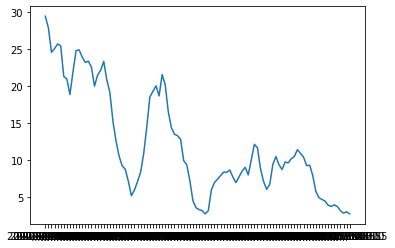

In [5]:
plt.plot(df_block['Time'].head(100),df_block['Power'].head(100))

In [6]:
df_block['Datetime']=pd.to_datetime(df_block['Time'])
df_block

/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,termNum,distNum,blockNum,Time,powerNum,Power,Datetime
0,1,1,13,2020/6/1 10:00,1,29.429,2020-06-01 10:00:00
1,1,1,13,2020/6/1 10:05,1,27.858,2020-06-01 10:05:00
2,1,1,13,2020/6/1 10:10,1,24.567,2020-06-01 10:10:00
3,1,1,13,2020/6/1 10:15,1,25.054,2020-06-01 10:15:00
4,1,1,13,2020/6/1 10:20,1,25.688,2020-06-01 10:20:00
...,...,...,...,...,...,...,...
3888,1,1,13,2020/6/9 9:20,1,1.305,2020-06-09 09:20:00
3889,1,1,13,2020/6/9 9:25,1,1.032,2020-06-09 09:25:00
3890,1,1,13,2020/6/9 9:30,1,0.818,2020-06-09 09:30:00
3891,1,1,13,2020/6/9 9:35,1,0.438,2020-06-09 09:35:00


In [7]:
df_block_sort=df_block.sort_values(by=['Datetime'])
df_block_sort=df_block_sort.reset_index(drop=True) # 重建索引
df_block_sort

,termNum,distNum,blockNum,Time,powerNum,Power,Datetime
0,1,1,13,2020/6/1 5:50,1,0.018,2020-06-01 05:50:00
1,1,1,13,2020/6/1 5:55,1,0.038,2020-06-01 05:55:00
2,1,1,13,2020/6/1 6:00,1,0.223,2020-06-01 06:00:00
3,1,1,13,2020/6/1 6:05,1,0.415,2020-06-01 06:05:00
4,1,1,13,2020/6/1 6:10,1,0.622,2020-06-01 06:10:00
...,...,...,...,...,...,...,...
3888,1,1,13,2020/6/25 21:11,1,0.806,2020-06-25 21:11:00
3889,1,1,13,2020/6/25 21:16,1,0.681,2020-06-25 21:16:00
3890,1,1,13,2020/6/25 21:21,1,0.425,2020-06-25 21:21:00
3891,1,1,13,2020/6/25 21:26,1,0.252,2020-06-25 21:26:00


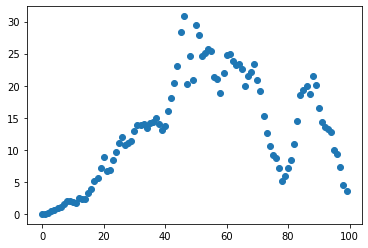

In [8]:
plt.figure()
plt.scatter(range(len(df_block_sort['Power'].head(100))),df_block_sort['Power'].head(100))

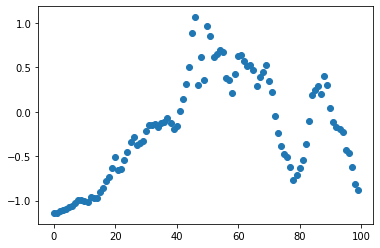

In [9]:
data=df_block_sort[['Power']]
scaler=StandardScaler()  # 标准化
data_scaled=scaler.fit_transform(data)
df_scaled=pd.DataFrame(data_scaled)
plt.scatter(range(100),data_scaled[:100])

In [10]:
model =  IsolationForest()  # 独立森林
model.fit(df_scaled)
df_block_sort['anomaly']=pd.Series(model.predict(df_scaled))

/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


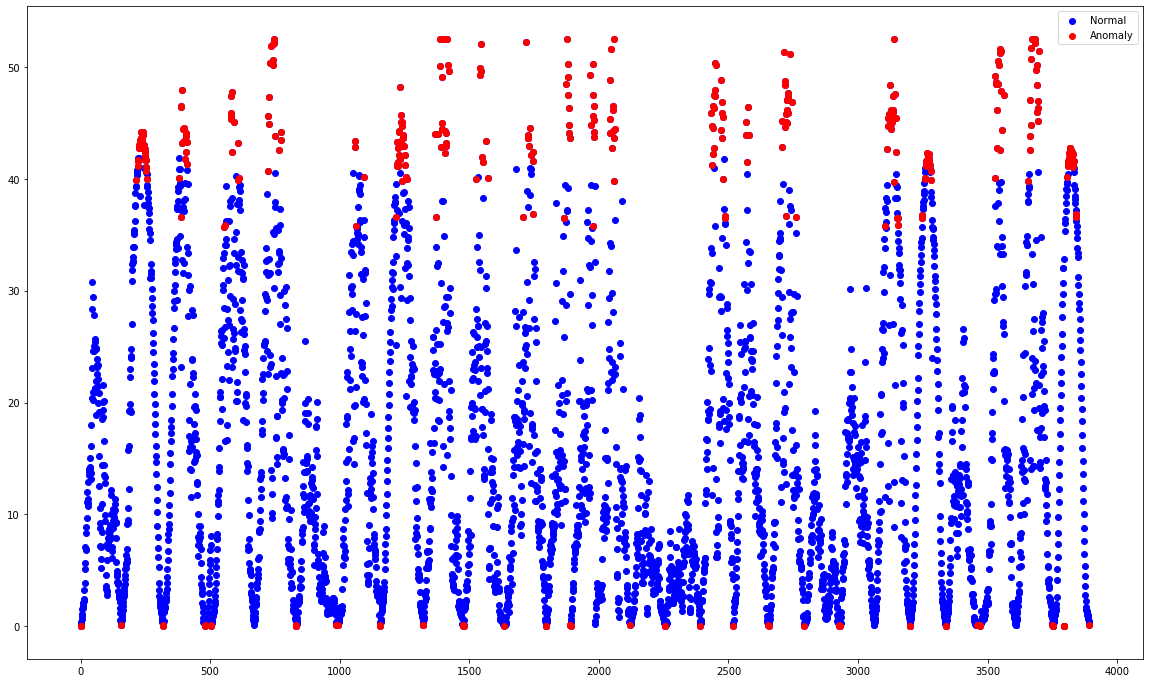

In [11]:
df_anomaly=df_block_sort.loc[df_block_sort['anomaly']==-1,['Power']]
fig_scl=2
fig, ax = plt.subplots(figsize=(10*fig_scl,6*fig_scl))
ax.scatter(df_block_sort.index,df_block_sort['Power'],color='blue', label = 'Normal')
ax.scatter(df_anomaly.index,df_anomaly['Power'],color='red', label = 'Anomaly')
plt.legend()
plt.show()